<a href="https://colab.research.google.com/github/apchavezr/16.-Aprendizaje-Profundo-para-Ciencia-de-Datos/blob/main/MLP_Pima_Diabetes_Actualizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejemplo aplicado: MLP para clasificación binaria**

**Introducción**

Este ejemplo tiene como objetivo aplicar una red neuronal de tipo perceptrón multicapa (MLP) para abordar un problema clásico de clasificación binaria: la predicción de diabetes. El conjunto de datos utilizado proviene del estudio de Pima Indians y contiene atributos biométricos y demográficos de pacientes.

# Carga y preprocesamiento de datos
En esta sección se cargan los datos desde un repositorio público, se renombran las columnas, se normalizan las características y se divide el conjunto en entrenamiento y prueba. Este paso es clave para garantizar la eficiencia del entrenamiento de la red neuronal.

# Definición y entrenamiento del modelo
A continuación, se define un modelo MLP utilizando la API secuencial de Keras. El modelo consta de una capa de entrada, dos capas ocultas con activación ReLU y una capa de salida con activación sigmoide. Se entrena utilizando el optimizador Adam y se utiliza una fracción del conjunto de entrenamiento para validación cruzada.

# MLP para datos tabulares (Pima Indians Diabetes)

In [1]:

# Clasificación binaria con MLP: Predicción de diabetes

## Paso 1: Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Paso 2: Cargar datos
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:

## Paso 3: Preprocesamiento
X = data.drop('Outcome', axis=1)
y = data['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Paso 4: Definir el modelo MLP
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
## Paso 5: Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.1)

## Paso 6: Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en test: {accuracy:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5704 - loss: 0.6885 - val_accuracy: 0.6452 - val_loss: 0.6481
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6853 - loss: 0.6287 - val_accuracy: 0.6613 - val_loss: 0.6092
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7497 - loss: 0.5561 - val_accuracy: 0.7258 - val_loss: 0.5679
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7628 - loss: 0.5099 - val_accuracy: 0.7419 - val_loss: 0.5382
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7673 - loss: 0.4976 - val_accuracy: 0.7097 - val_loss: 0.5192
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7895 - loss: 0.4637 - val_accuracy: 0.6935 - val_loss: 0.5074
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7960 - loss: 0.4479 - val_accuracy: 0.6935 - val_loss: 0.5044
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7911 - loss: 0.4896 - val_accuracy: 0.7258 - val_los

El modelo logró una precisión general (accuracy) del 74 %, lo cual indica que aproximadamente tres de cada cuatro predicciones fueron correctas en el conjunto de prueba. Sin embargo, es importante desglosar esta métrica para interpretar su valor práctico.

    Para la clase 0 (no diabético), el modelo obtuvo una
    precisión de 0.79 y un recall de 0.81, lo que muestra
    un buen desempeño al identificar correctamente a los
    pacientes que no presentan diabetes. El f1-score de
    0.80 refuerza que el equilibrio entre precisión y
    cobertura es adecuado para esta clase.
    
    Para la clase 1 (diabético), los valores fueron
    notablemente más bajos: precisión de 0.64, recall de 0.
    62 y f1-score de 0.63. Esto indica que el modelo tiene
    dificultades para identificar correctamente a los
    pacientes con diabetes, y comete una proporción
    considerable de falsos negativos, es decir, casos en
    los que predice incorrectamente que el paciente no
    tiene la enfermedad.
    
    El promedio ponderado (weighted avg) de las métricas
    se mantiene cercano al valor de accuracy, dado que la
    clase 0 tiene mayor representación (99 vs. 55 casos).
    Sin embargo, el promedio macro (macro avg) —que da
    igual peso a ambas clases— revela un rendimiento más
    bajo (0.71 de precisión, recall y f1-score), lo cual
    evidencia un desequilibrio en el desempeño entre     
    clases.


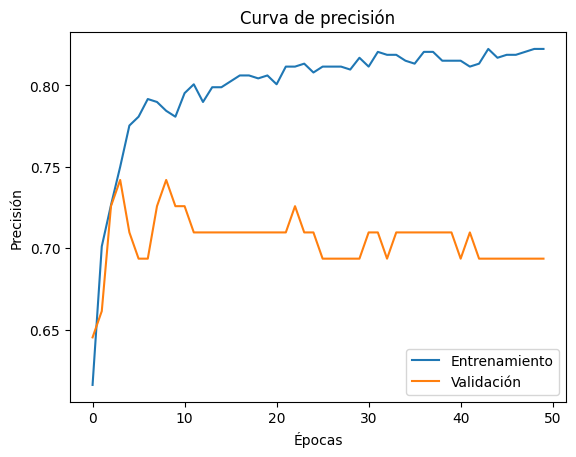

In [5]:
## Paso 7: Visualizar curvas de aprendizaje
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Curva de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

**Interpretación**  

* Incremento temprano en precisión (épocas 0 a 10):     En ambas curvas se observa un crecimiento inicial rápido. Esto es esperado, ya que el modelo empieza a aprender patrones básicos del conjunto de datos. La precisión en validación incluso alcanza su punto más alto muy temprano (épocas 5 a 7).

* Estancamiento y caída en validación:     Después de las primeras 10 épocas, la precisión en validación deja de mejorar y fluctúa en un rango más bajo (entre 0.69 y 0.72). Esto sugiere que el modelo no está mejorando su capacidad de generalización, y podría estar comenzando a memorizar los datos del entrenamiento en lugar de aprender patrones útiles para nuevos datos.

* Divergencia entre curvas (sobreajuste):    La curva de entrenamiento continúa ascendiendo hasta estabilizarse por encima del 80 %, mientras que la de validación no mejora e incluso decrece ligeramente. Esta diferencia creciente entre ambas curvas indica sobreajuste (overfitting). El modelo se adapta demasiado bien al conjunto de entrenamiento, lo que perjudica su rendimiento en datos no vistos.

**Recomendaciones**

    Regularización: introducir técnicas como dropout, L2
    regularization o disminuir la complejidad del modelo
    (menos neuronas o capas) podría ayudar a reducir el
    sobreajuste.

    Técnicas de early stopping: monitorear la métrica de
    validación y detener el entrenamiento si no mejora
    tras un número determinado de épocas podría evitar que
    el modelo continúe sobreajustando.

    Ajustes en el conjunto de datos: si el desequilibrio
    entre clases es alto, aplicar resampling, class
    weighting o generar más datos sintéticos para la clase
    minoritaria puede mejorar el rendimiento en validación.

En conclusión, aunque el modelo MLP logra una precisión aceptable en entrenamiento, la curva evidencia dificultades para generalizar, especialmente en una tarea sensible como la predicción de diabetes. El análisis sugiere que el modelo necesita ajustes tanto en su arquitectura como en el enfoque de entrenamiento para mejorar su desempeño real.